<br><br><br><br>
<h4><b>Data Analysis - Inflow_Outflow Dataset</b></h4>
<br><br>

<pre>  
<b>1. Environment setup-used</b>
<br>
<b>2. Notebook Flow</b>
      2.1 File Read
      2.2 Pre-processing of Inflow_Outflow dataset  
           a. Basic understanding of the data 
                - Sample data display
                - No of observations 
                - Datatype of the features
           b. Inspecing missing values/nan, if there is any
           c. Removal (or) replacing missing values/nan if necessary 
           d. Visual inspection of data
           e. Drescriptive statistics
<br>
<b>3. Assumptions & Takeaway</b>
<br>
</pre>

In [1]:
import numpy as np
import pandas as pd
import os

#----- Plotting & Visualization
import matplotlib.pyplot as plt
import seaborn as sb
bold_s = '\033[1m' #----- To print bold font
bold_e = '\033[0m'

#----- Pre-Processing
from utils import Preprocess, file_read

#----- Stats
from scipy.stats import norm

<br><br><br>
<h4><b>2.1 File Read</b></h4>
<pre>
File reading of Inflow_Outflow
</pre>

In [5]:
Inflow_Outflow = file_read('Inflow_Outflow')

<br><br><br>
<h4><b>2.2 Pre-processing of 'Inflow_Outflow' dataset  </b></h4>
<pre>
    a. Basic understanding of the data 
        - Sample data display
        - No of observations 
        - Datatype of the features
    b. Inspecing missing values/nan, if there is any
    c. Removal (or) replacing missing values/nan if necessary 
    d. Visual inspection of data
    e. Drescriptive statistics
</pre>

In [6]:
preprocess = Preprocess()

In [7]:
#----- a. Basic understanding of the data
preprocess.display_data(Inflow_Outflow,'Inflow_Outflow')




#----- Displaying top 5 rows of data-group:Inflow_Outflow


,Client,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1017,0.005000,0.005000,1,1,118.046429,118.046429,25.000000,91.796429,0.000000,12,12,2,9,0
1,1456,364.772143,364.752857,4,3,774.980000,774.980000,14.285714,497.444286,258.607143,28,28,1,20,5
2,545,2471.719286,2471.719286,14,14,2190.257143,2190.257143,303.571429,179.082143,1229.428571,23,23,3,5,12
3,667,1127.792857,1127.792857,4,4,1344.603571,1344.603571,642.857143,194.285714,249.321429,21,21,3,4,8
4,1381,571.618214,571.618214,3,3,57.071429,57.071429,10.714286,46.357143,0.000000,6,6,1,5,0



#----- No.of observations
1587

#----- features' datatypes and other info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Client                        1587 non-null   int64  
 1   VolumeCred                    1587 non-null   float64
 2   VolumeCred_CA                 1587 non-null   float64
 3   TransactionsCred              1587 non-null   int64  
 4   TransactionsCred_CA           1587 non-null   int64  
 5   VolumeDeb                     1587 non-null   float64
 6   VolumeDeb_CA                  1587 non-null   float64
 7   VolumeDebCash_Card            1587 non-null   float64
 8   VolumeDebCashless_Card        1587 non-null   float64
 9   VolumeDeb_PaymentOrder        1587 non-null   float64
 10  TransactionsDeb               1587 non-null   int64  
 11  TransactionsDeb_CA            1587 non-null   

In [8]:
#----- b. Inspecting missing values
preprocess.inspect_missing_values(Inflow_Outflow)




#----- Inspecting missing values
Client                          0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDeb_CA              0
TransactionsDebCash_Card        0
TransactionsDebCashless_Card    0
TransactionsDeb_PaymentOrder    0
dtype: int64


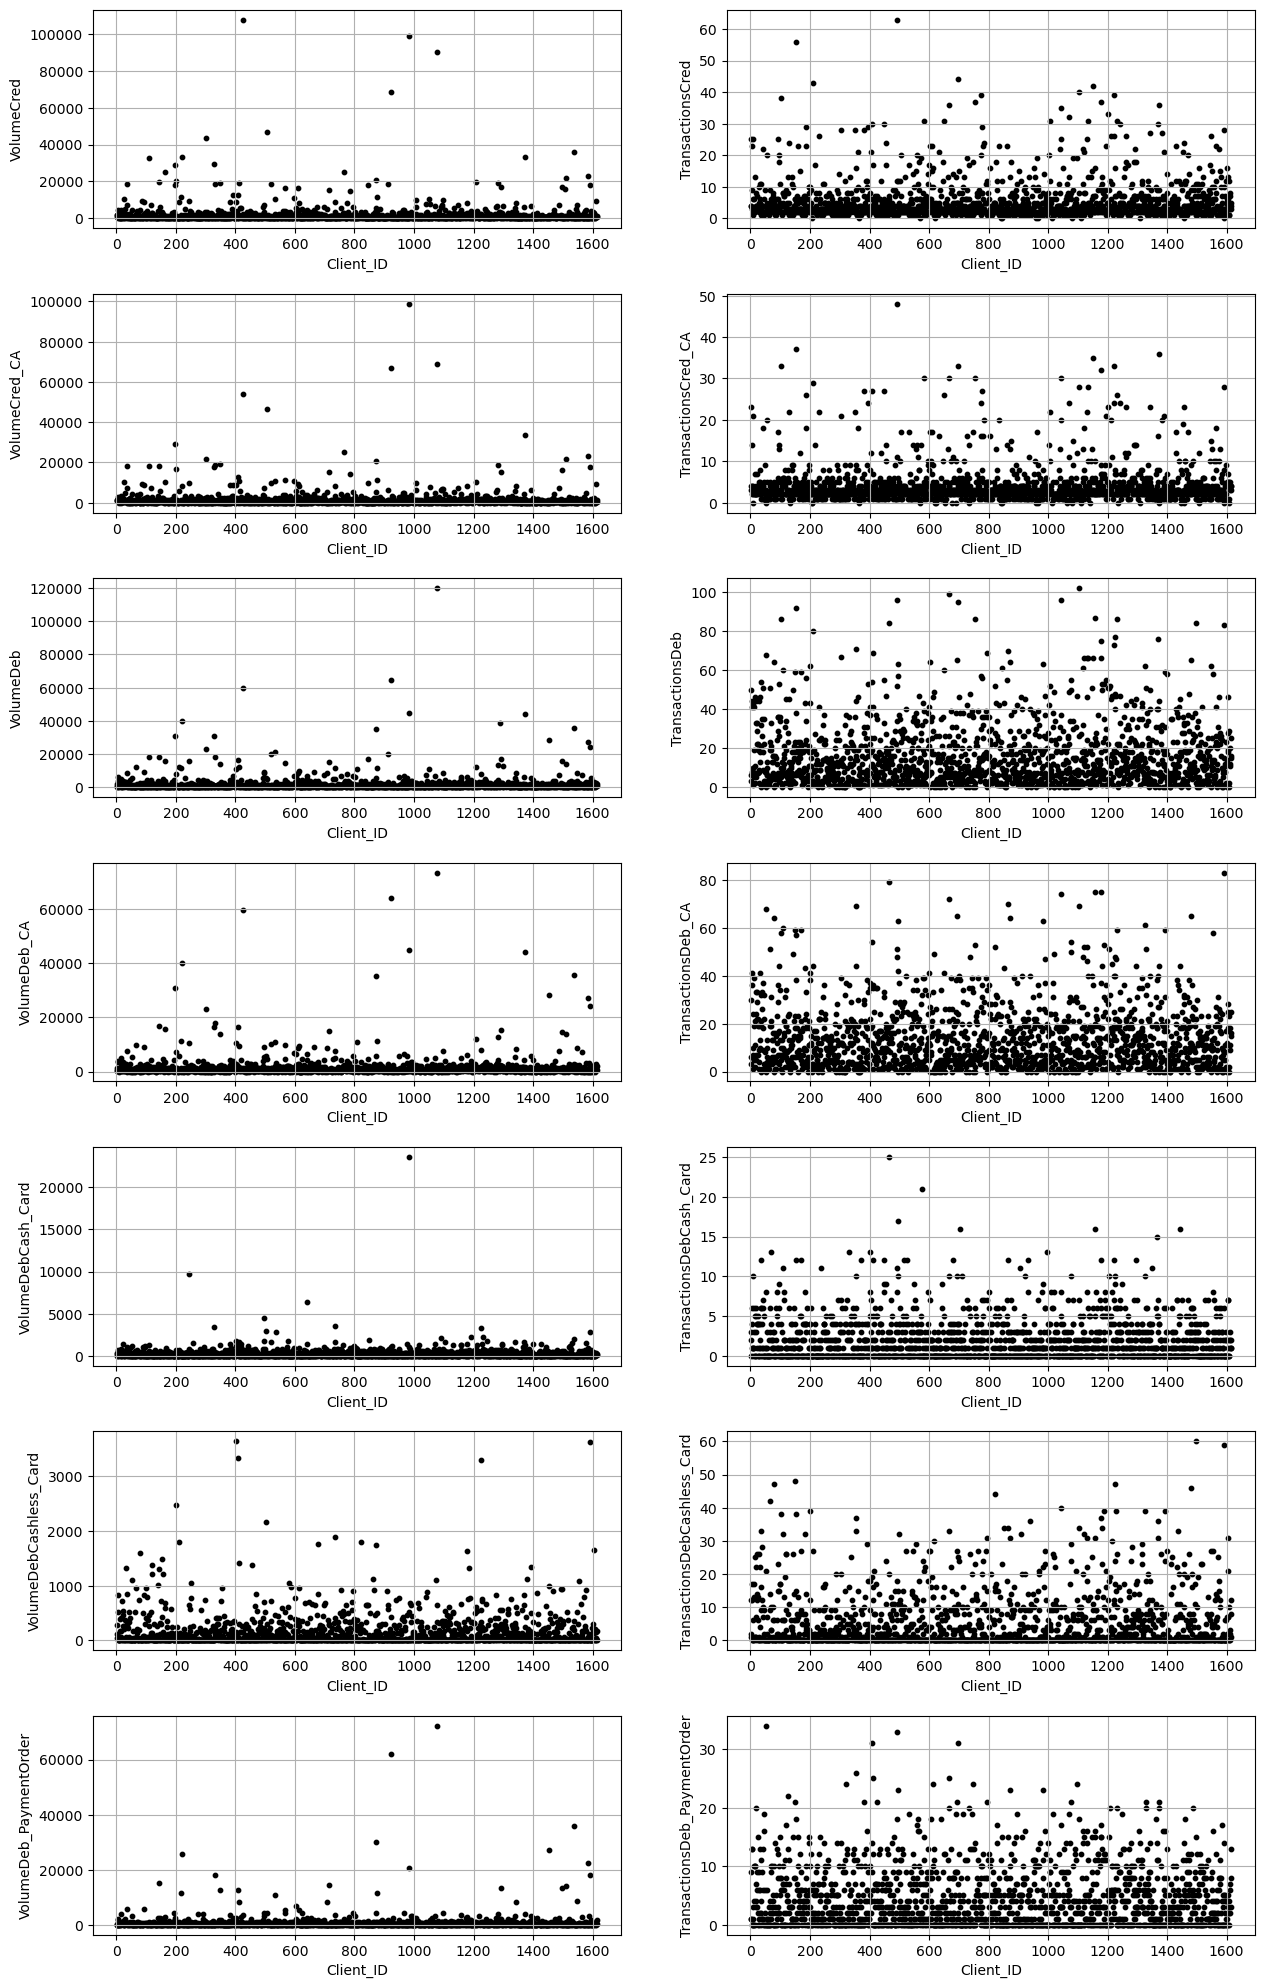

In [31]:
#----- d. Visual Inspection of the Soc_Dem

fig, axs = plt.subplots(7,2, figsize = (15,25))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

columns = list(Inflow_Outflow.columns)

#------ Graphing scattered plot of client vs feature values
for i in range(0,7):
    for j in range(0,2): 
        if i<2: feature = columns[(i+1) + (2*j)]  
        else: feature = columns[(i+3) + (5*j)]
            
        axs[i,j].scatter( Inflow_Outflow['Client'], Inflow_Outflow[feature], color = 'black', s = 10)
        axs[i,j].set(xlabel = 'Client_ID' , ylabel = feature)
        axs[i,j].grid(True)    
        
plt.show()

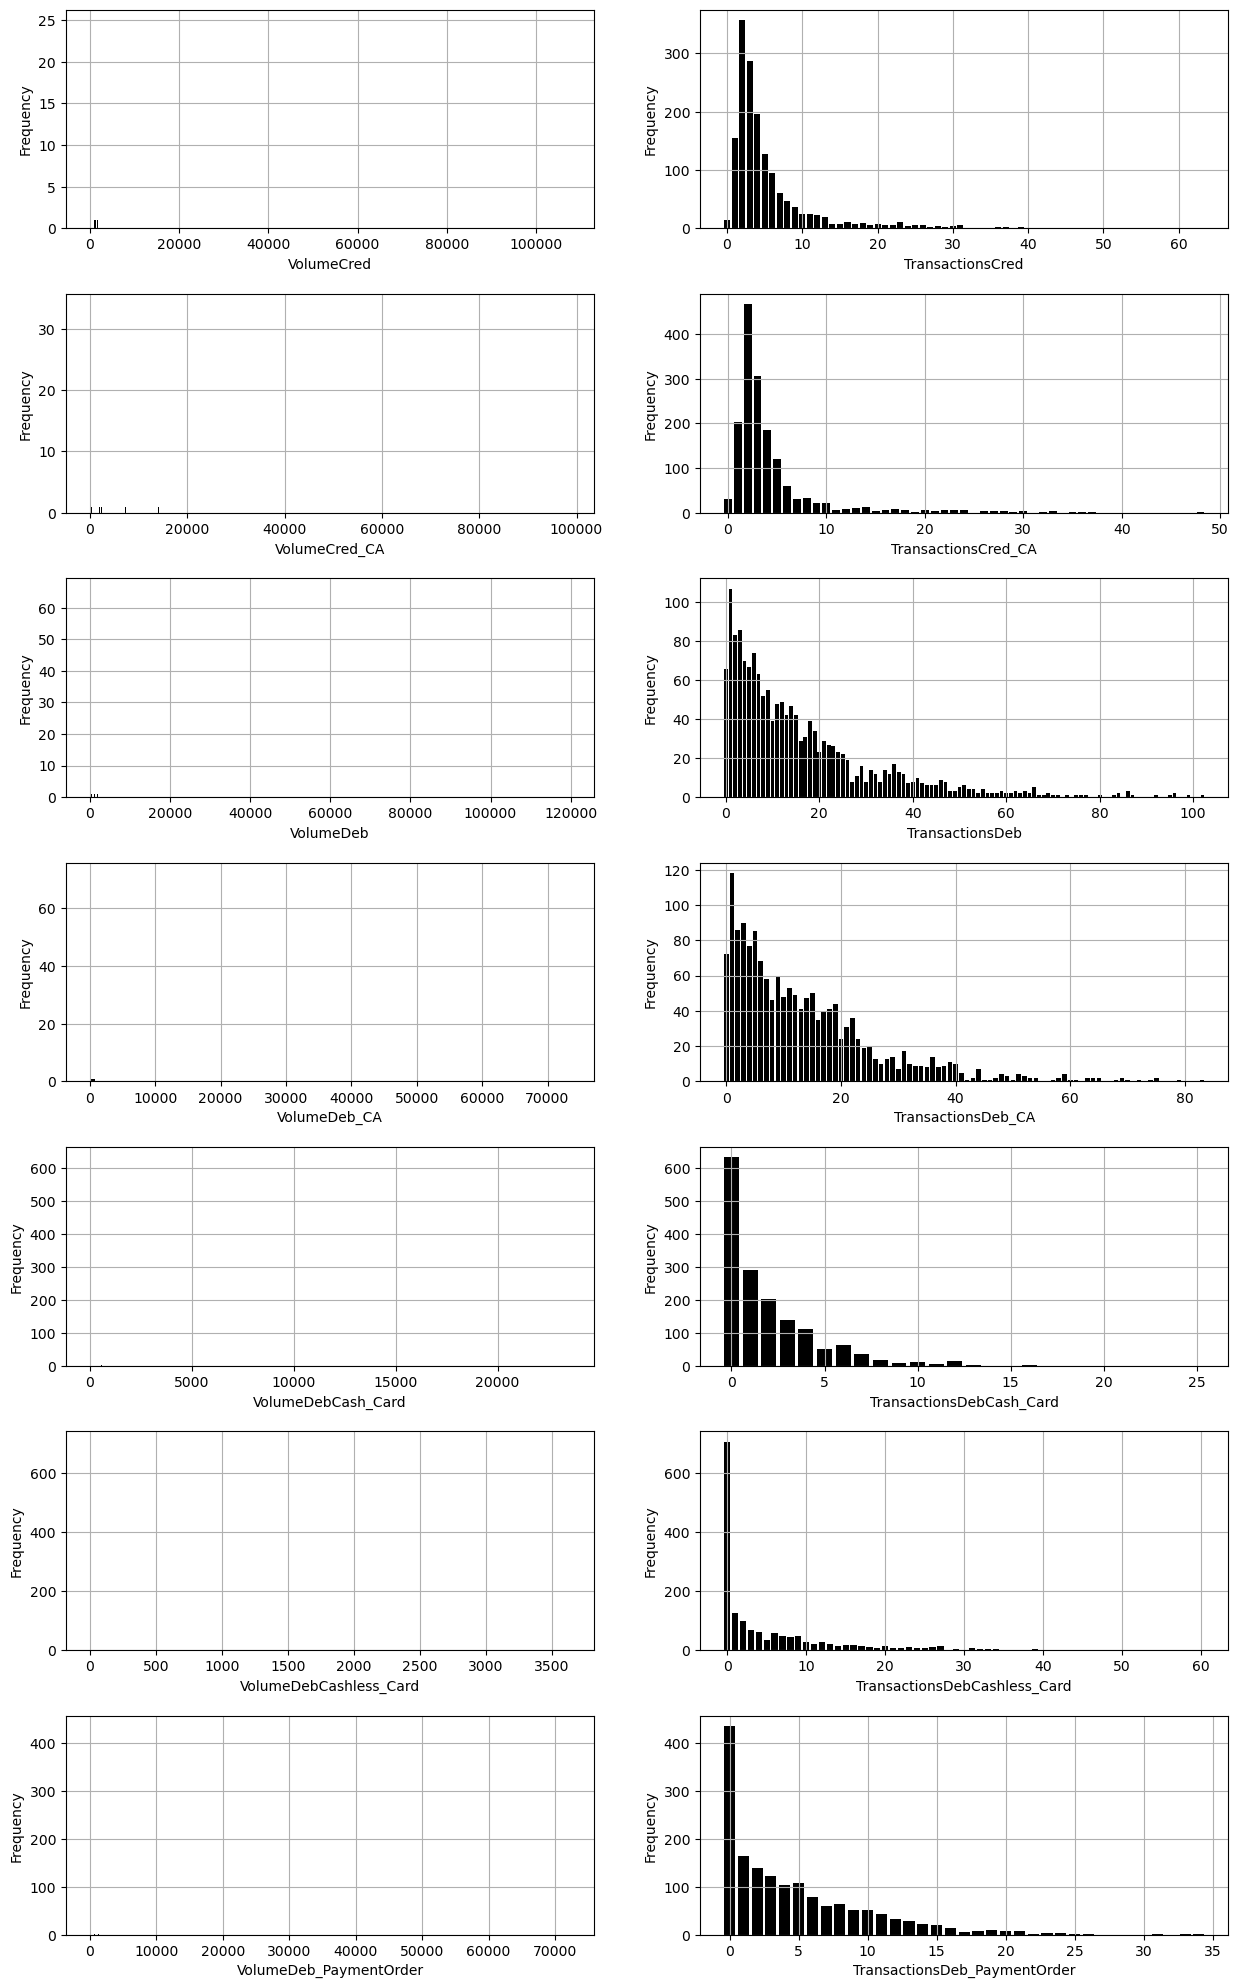

In [34]:
#----- d. Visual Inspection of the Soc_Dem

fig, axs = plt.subplots(7,2, figsize = (15,25))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

#------ Bar graph
for i in range(0,7):
    for j in range(0,2): 
        if i<2: feature = columns[(i+1) + (2*j)]  
        else: feature = columns[(i+3) + (5*j)]
    
        temp = Inflow_Outflow[feature].value_counts()
        axs[i,j].bar(temp.index,temp, color = 'black')
        axs[i,j].set(xlabel = feature, ylabel = 'Frequency')
        axs[i,j].grid(True)    

plt.show()

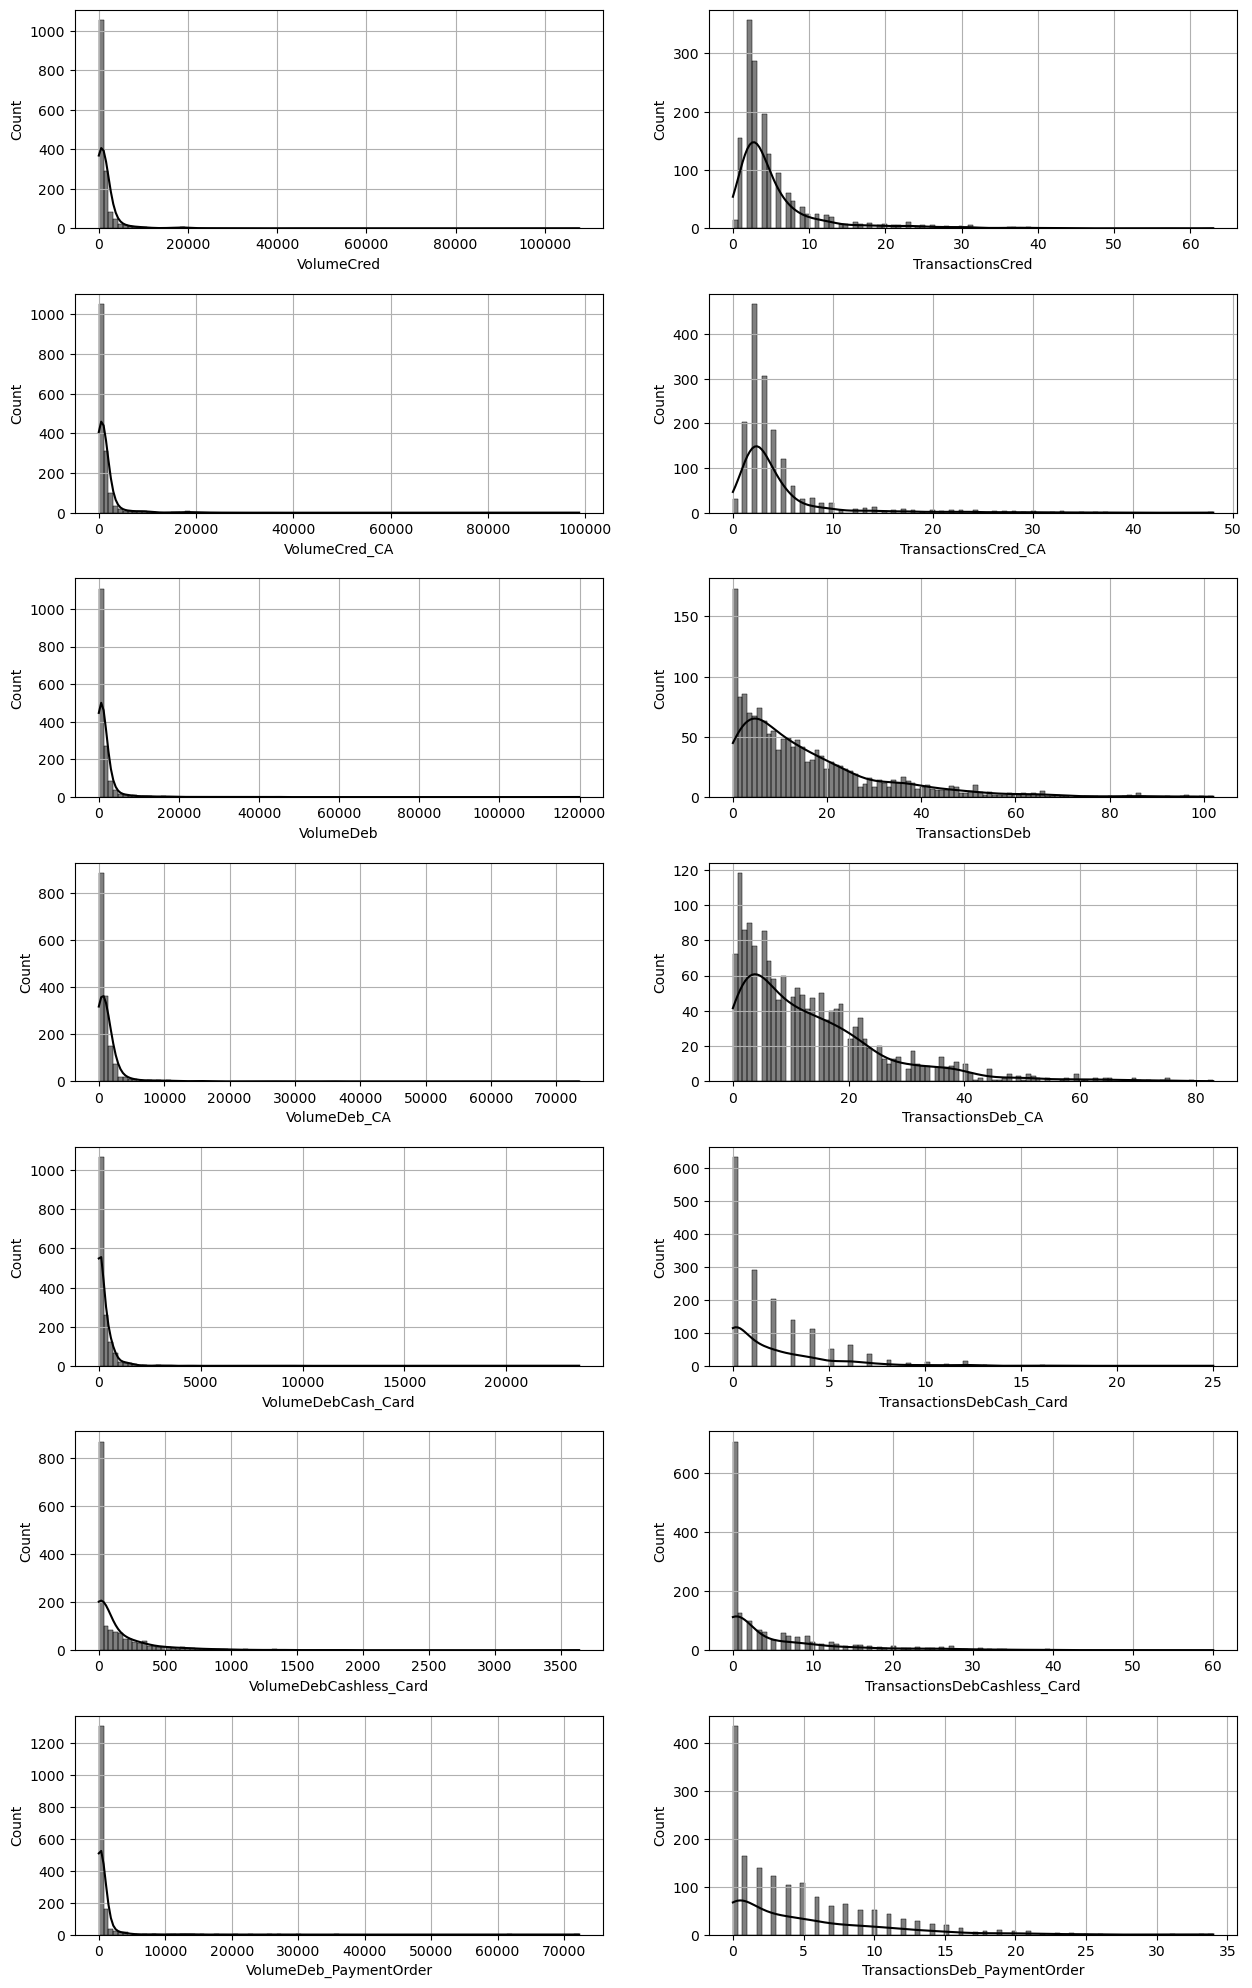

In [36]:
#----- d. Visual Inspection of the Soc_Dem

fig, axs = plt.subplots(7,2, figsize = (15,25))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(0,7):
    for j in range(0,2): 
        if i<2: feature = columns[(i+1) + (2*j)]  
        else: feature = columns[(i+3) + (5*j)]
        
        sb.histplot(Inflow_Outflow[feature],bins = 100, kde = True,ax = axs[i,j],color='black')
        axs[i,j].grid(True)
       
plt.show()

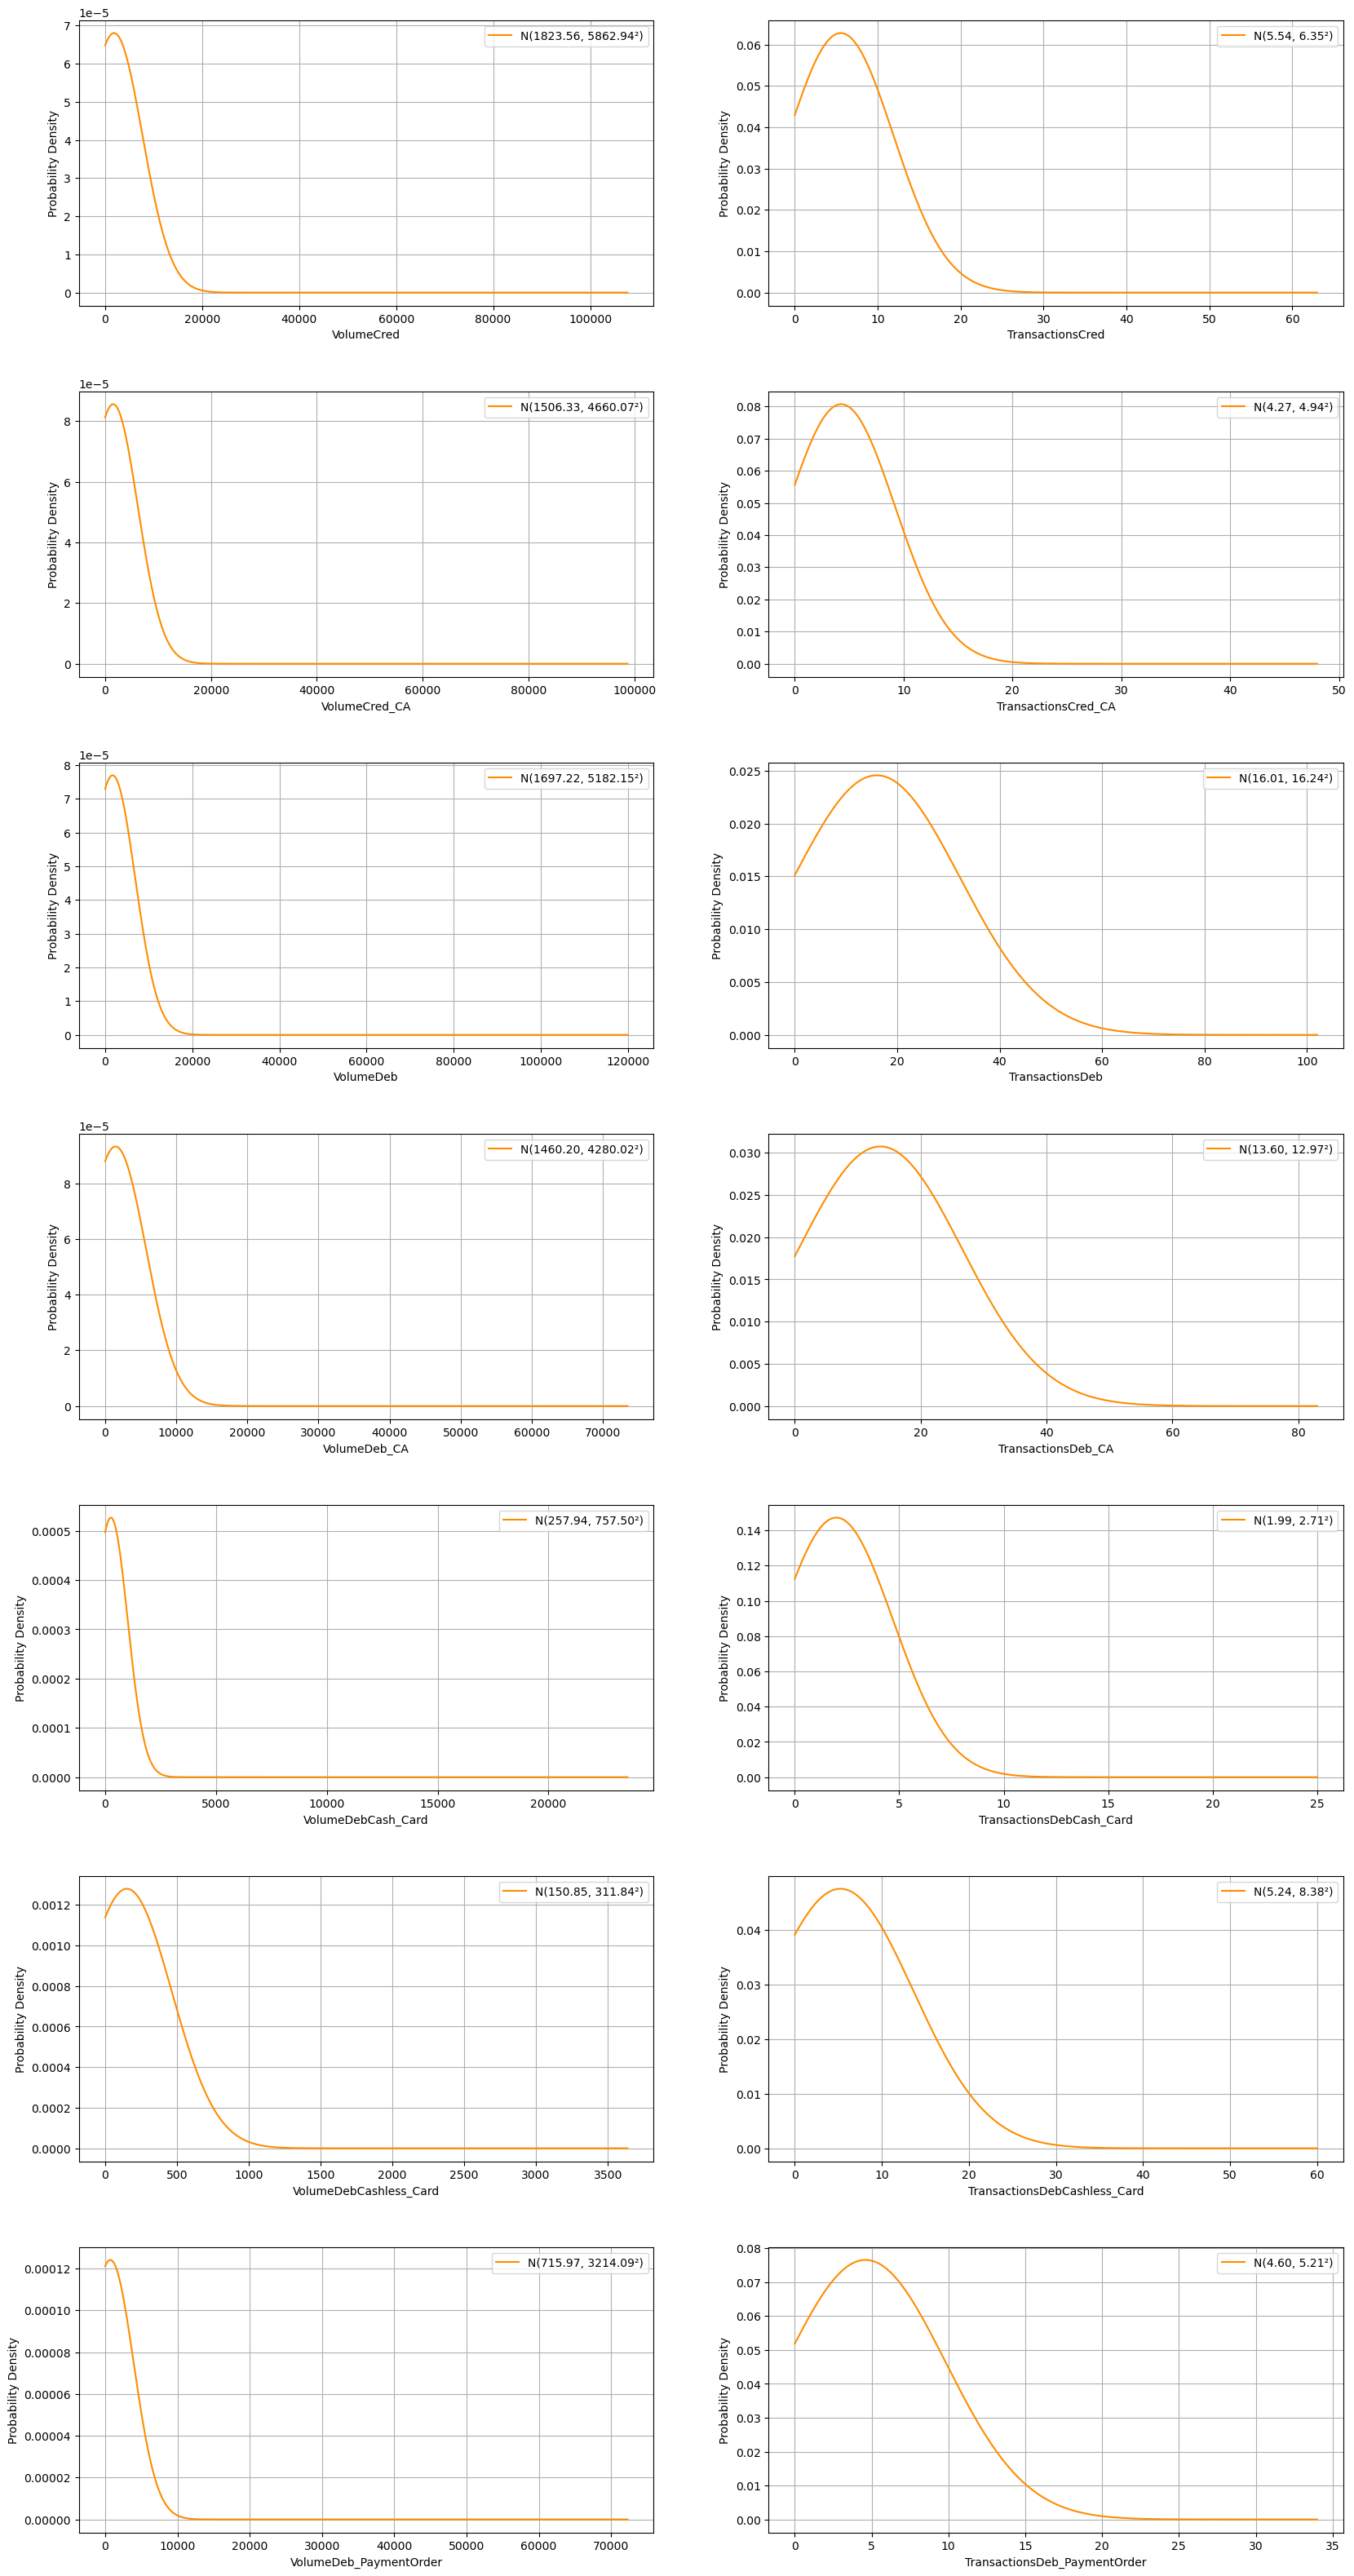

In [46]:
#----- d. Visual Inspection of the Soc_Dem
fig, axs = plt.subplots(7,2, figsize = (20,40))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(0,7):
    for j in range(0,2): 
        if i<2: feature = columns[(i+1) + (2*j)]  
        else: feature = columns[(i+3) + (5*j)]
        feature_data = Inflow_Outflow[feature]

        mean, std = norm.fit(feature_data)
        x = np.linspace(min(feature_data), max(feature_data), 1000)
        y = norm.pdf(x, mean,std)
        
        axs[i,j].plot(x, y, color='darkorange',label = f'N({mean:.2f}, {std:.2f}²)')
        axs[i,j].set(xlabel = feature, ylabel = 'Probability Density')
        axs[i,j].legend()
        axs[i,j].grid(True)
     
plt.show()

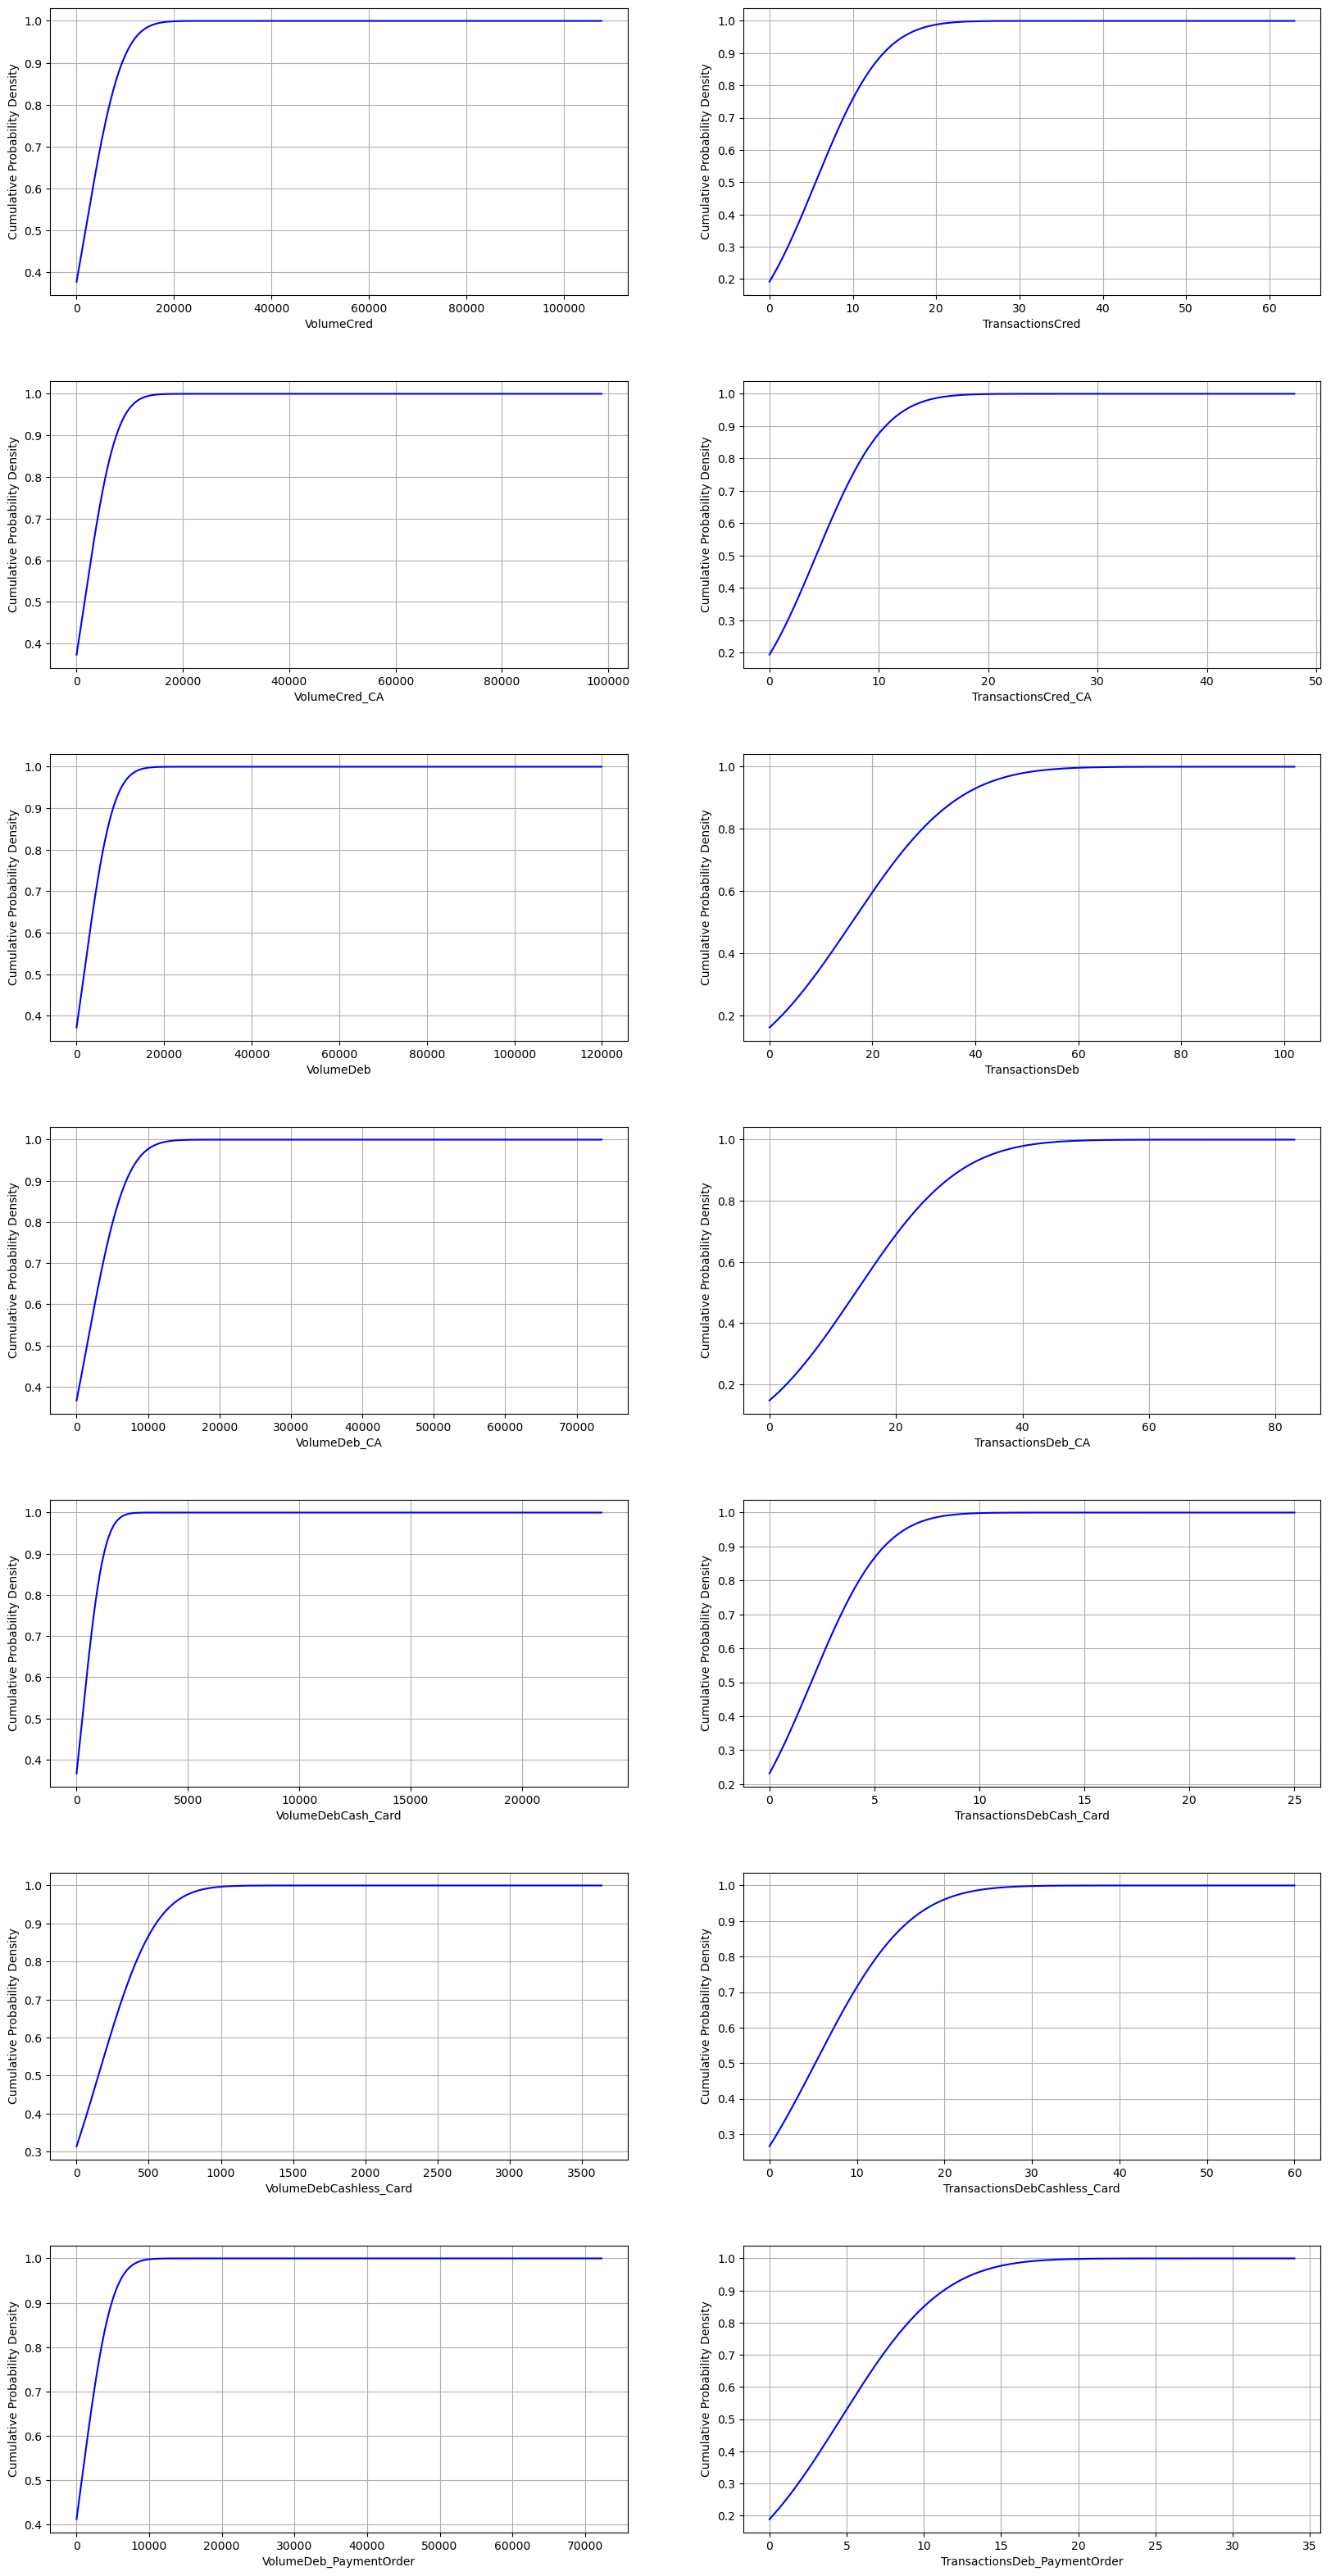

In [43]:
fig, axs = plt.subplots(7,2, figsize = (20,40))
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(0,7):
    for j in range(0,2): 
        if i<2: feature = columns[(i+1) + (2*j)]  
        else: feature = columns[(i+3) + (5*j)]
        feature_data = Inflow_Outflow[feature]
    
        mean, std = norm.fit(feature_data)
        x = np.linspace(min(feature_data), max(feature_data), 1000)
        y = norm.pdf(x, mean,std)
        
        cdf = norm.cdf(x, mean,std)
        
        axs[i,j].plot(x, cdf, color='blue')
        axs[i,j].set(xlabel = feature, ylabel = 'Cumulative Probability Density')
        axs[i,j].grid(True)
        
plt.show()

In [45]:
#----- e. Descriptive Statistics
preprocess.descriptive_stats(Inflow_Outflow, 'Inflow_Outflow', columns[1:15])


#----- Descriptive Stats of feature: VolumeCred of data-group:Inflow_Outflow
Mean:1823.5595717436315 Std:5864.792551787933
Min_value :0.0 Max_value:107703.80428571429

#----- Descriptive Stats of feature: VolumeCred_CA of data-group:Inflow_Outflow
Mean:1506.3291131064905 Std:4661.535695857272
Min_value :0.0 Max_value:98717.675

#----- Descriptive Stats of feature: TransactionsCred of data-group:Inflow_Outflow
Mean:5.541902961562697 Std:6.355383348892893
Min_value :0 Max_value:63

#----- Descriptive Stats of feature: TransactionsCred_CA of data-group:Inflow_Outflow
Mean:4.2652804032766225 Std:4.94403209034418
Min_value :0 Max_value:48

#----- Descriptive Stats of feature: VolumeDeb of data-group:Inflow_Outflow
Mean:1697.2186582950762 Std:5183.787843676734
Min_value :0.0 Max_value:119906.50392857143

#----- Descriptive Stats of feature: VolumeDeb_CA of data-group:Inflow_Outflow
Mean:1460.2029032766227 Std:4281.369955522505
Min_value :0.0 Max_value:73477.93250000001

#----- Descriptive S